<a href="https://colab.research.google.com/github/Jundo22l/Jundo22l/blob/main/IOU_pytorchver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def compute_iou(box1, box2):
    """
    두 바운딩 박스 간의 Intersection over Union (IoU)을 계산합니다.

    Parameters:
    box1 (tensor): 첫 번째 바운딩 박스 [x1, y1, x2, y2]
    box2 (tensor): 두 번째 바운딩 박스 [x1, y1, x2, y2]

    Returns:
    float: IoU 값
    """
    # 두 박스의 Union 영역의 좌상단 좌표
    x1 = torch.max(box1[0], box2[0])
    y1 = torch.max(box1[1], box2[1])

    # 두 박스의 Union 영역의 우하단 좌표
    x2 = torch.min(box1[2], box2[2])
    y2 = torch.min(box1[3], box2[3])

    # Union 영역의 면적 계산 clamp 함수를 이용. 입력값과 설정한 최소,최댓값을 비교하여 결과를 산출한다.
    inter_area = torch.clamp(x2 - x1, min=0) * torch.clamp(y2 - y1, min=0)

    # 첫 번째 바운딩 박스의 면적 계산
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])

    # 두 번째 바운딩 박스의 면적 계산
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # IoU 계산: 교차 영역의 면적을 합친 면적에서 교차 영역의 면적을 나눔
    iou = inter_area / (box1_area + box2_area - inter_area)

    # IoU와 교차 박스의 좌표를 반환
    return iou, (x1, y1, x2, y2)

In [10]:
def plot_boxes(box1, box2, inter_box, iou):
    """
    바운딩 박스와 교차 영역을 시각화합니다.

    Parameters:
    box1 (tensor): 첫 번째 바운딩 박스 [x1, y1, x2, y2]
    box2 (tensor): 두 번째 바운딩 박스 [x1, y1, x2, y2]
    inter_box (tuple): 교차 영역의 좌상단 및 우하단 좌표 (x1, y1, x2, y2)
    iou (float): IoU 값
    """
    fig, ax = plt.subplots(1)  # 새로운 그림 및 축 생성

    ax.set_facecolor((1, 1, 1))  # 배경색을 흰색으로 설정

    # 첫 번째 바운딩 박스 시각화 (빨간색 테두리)
    rect1 = patches.Rectangle((box1[0], box1[1]), box1[2]-box1[0], box1[3]-box1[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect1)  # 그림에 첫 번째 바운딩 박스 추가

    # 두 번째 바운딩 박스 시각화 (파란색 테두리)
    rect2 = patches.Rectangle((box2[0], box2[1]), box2[2]-box2[0], box2[3]-box2[1], linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect2)  # 그림에 두 번째 바운딩 박스 추가

    # 교차 영역 시각화 (초록색 점선 테두리)
    if inter_box[2] > inter_box[0] and inter_box[3] > inter_box[1]:
        inter_rect = patches.Rectangle((inter_box[0], inter_box[1]), inter_box[2]-inter_box[0], inter_box[3]-inter_box[1], linewidth=1, edgecolor='g', facecolor='none', linestyle='--')
        ax.add_patch(inter_rect)  # 그림에 교차 영역 추가

    # IoU 값을 텍스트로 표시
    plt.text(0.5, 1.05, f'IoU: {iou:.4f}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

    # x축과 y축의 범위 설정 (모든 박스가 포함되도록)
    all_coords = torch.cat((box1, box2))
    ax.set_xlim(all_coords.min().item() - 1, all_coords.max().item() + 1)
    ax.set_ylim(all_coords.min().item() - 1, all_coords.max().item() + 1)

    plt.gca().set_aspect('equal', adjustable='box')  # 축의 비율을 동일하게 설정
    plt.show()  # 그림을 화면에 표시

IoU: 0.2222


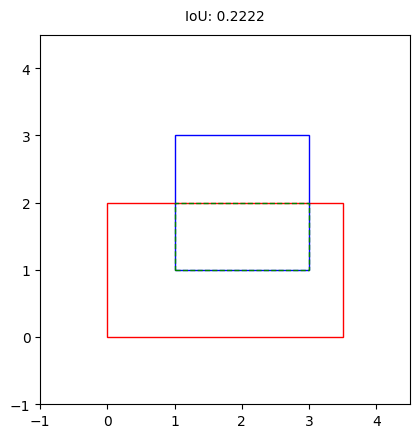

In [14]:
# 사용 예시:
box1 = torch.tensor([0.0, 0.0, 3.5, 2.0])  # 첫 번째 바운딩 박스 좌표
box2 = torch.tensor([1.0, 1.0, 3.0, 3.0])  # 두 번째 바운딩 박스 좌표
iou, inter_box = compute_iou(box1, box2)  # IoU 및 교차 영역 계산
print(f'IoU: {iou:.4f}')  # IoU 값 콘솔에 출력
plot_boxes(box1, box2, inter_box, iou)  # 바운딩 박스와 교차 영역을 시각화